In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Function for Dilation

In [2]:
def dilation(image,struct_element):
    dilated_image = image.copy()
    height, width = image.shape
    struct_element = struct_element * 255
    offset = struct_element.shape[0] // 2

    for r in range(height):
        for c in range(width):
            hit = False
            for x in range(-offset, offset+1):
                for y in range(-offset, offset+1):
                    sr = x+offset
                    sc = y+offset
                    if (r+x >= 0 and r+x < height and c+y>=0 and c+y < width):
                        if(image[r+x, c+y] and struct_element[sr,sc] == struct_element[sr,sc]):
                            hit = True
            dilated_image[r,c] = 255 if hit else 0
    
    return np.uint8(dilated_image)

# Function for Rigin Filling

In [3]:
def region_filling(image, seed_point):
    # Step 1: Complement of the image (Aᶜ)
    A_comp = cv2.bitwise_not(image)

    # Step 2: Structuring element (cross shape)
    kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)

    # Step 3: Initialize X0 with seed point
    X = np.zeros_like(image, dtype=np.uint8)
    X[seed_point[1], seed_point[0]] = 255  # note: (x, y) format

    # Step 4: Iterate until convergence
    while True:
        X_prev = X.copy()
        X_dilated = cv2.dilate(X, kernel)
        X = cv2.bitwise_and(X_dilated, A_comp)

        if np.array_equal(X, X_prev):
            break

    # Step 5: Union filled region with boundary (A ∪ X)
    filled = cv2.bitwise_or(X, image)

    return filled

# Create Structuring Element

In [4]:
struct_element_size = 3
struct_element = np.ones((struct_element_size,struct_element_size))

# Load Image

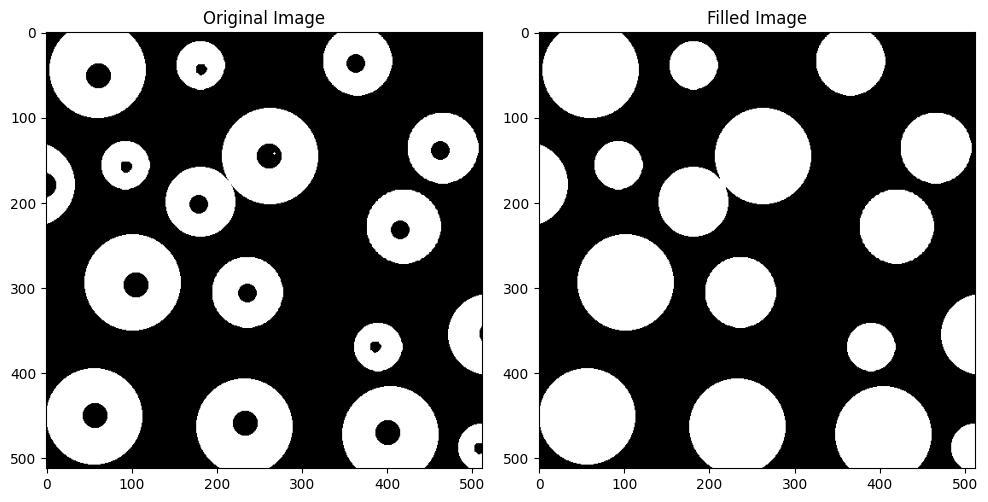

In [7]:
image = cv2.imread('region_filling.tif',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512,512))

#inverted_img = cv2.bitwise_not(image)

seed = (0, 0)
filled_image = image + cv2.bitwise_not(region_filling(image, seed))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(filled_image, cmap='gray')
plt.title("Filled Image")

plt.tight_layout()
plt.show()